In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dense, Dropout, Flatten

from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
input_shape = (28,28,1)

# Adding Noise to the Images

In [4]:
#FGSM add noise to the image
noise_factor = 0.7
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

In [5]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Perturbated Images Visualization

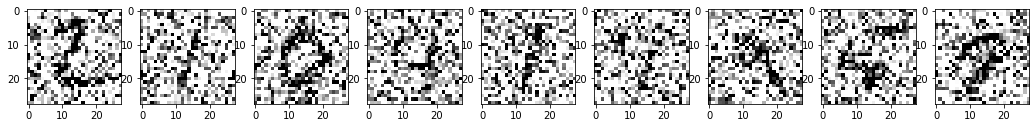

In [6]:
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

# Autoencoder Model Creation

In [7]:
autoencoder_model = Sequential()
autoencoder_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
autoencoder_model.add(MaxPooling2D((2, 2), padding='same'))
autoencoder_model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
autoencoder_model.add(MaxPooling2D((2, 2), padding='same'))
autoencoder_model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
autoencoder_model.add(MaxPooling2D((2, 2), padding='same'))
autoencoder_model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder_model.add(UpSampling2D((2, 2)))
autoencoder_model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder_model.add(UpSampling2D((2, 2)))
autoencoder_model.add(Conv2D(32, (3, 3), activation='relu'))
autoencoder_model.add(UpSampling2D((2, 2)))
autoencoder_model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

In [8]:
autoencoder_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [9]:
history = autoencoder_model.fit(x_train_noisy, x_train,
                      epochs=10,
                      batch_size=256, 
                      shuffle=True, 
                      validation_data=(x_test_noisy, x_test)
                      )

Epoch 1/10
235/235 [==============================] - 15s 13ms/step - loss: 0.0547 - accuracy: 0.7984 - val_loss: 0.0422 - val_accuracy: 0.7952
Epoch 2/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0393 - accuracy: 0.8000 - val_loss: 0.0367 - val_accuracy: 0.8010
Epoch 3/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0354 - accuracy: 0.8021 - val_loss: 0.0336 - val_accuracy: 0.8038
Epoch 4/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0328 - accuracy: 0.8034 - val_loss: 0.0314 - val_accuracy: 0.8025
Epoch 5/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0311 - accuracy: 0.8042 - val_loss: 0.0301 - val_accuracy: 0.8051
Epoch 6/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0299 - accuracy: 0.8048 - val_loss: 0.0290 - val_accuracy: 0.8038
Epoch 7/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0289 - accuracy: 0.8053 - val_loss: 0.0282 - val_accuracy: 0.803

In [10]:
autoencoder_model.evaluate(x_test_noisy, x_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0269 - accuracy: 0.8067


[0.026868609711527824, 0.8067238330841064]

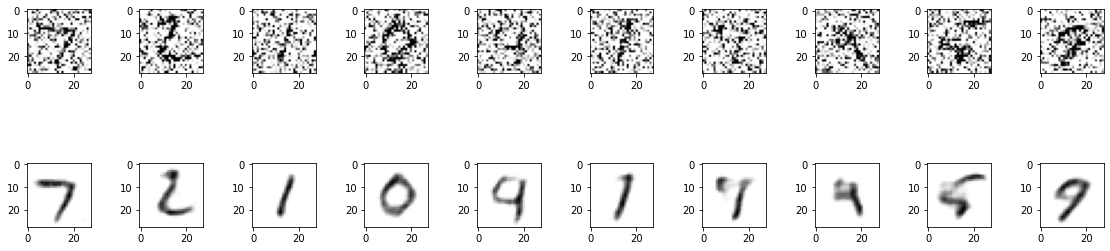

In [11]:
image_with_no_noise = autoencoder_model.predict(x_test_noisy)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="Greys")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(image_with_no_noise[i].reshape(28, 28), cmap="Greys")
plt.show()

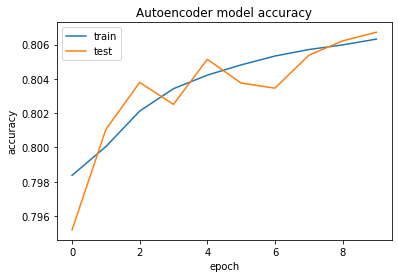

In [12]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Autoencoder model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

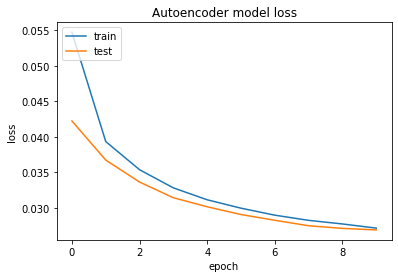

In [13]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Autoencoder model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
batch_size = 256
number_of_classes = 10
epochs = 10

In [15]:
y_train = keras.utils.to_categorical(y_train, number_of_classes)
y_test = keras.utils.to_categorical(y_test, number_of_classes)

In [16]:
y_test.shape

(10000, 10)

In [17]:
gradcam_model = Sequential()
gradcam_model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
gradcam_model.add(Conv2D(64, (3, 3), activation='relu'))
gradcam_model.add(MaxPooling2D(pool_size=(2, 2)))
gradcam_model.add(Conv2D(128, (3, 3), activation='relu'))
gradcam_model.add(MaxPooling2D(pool_size=(2, 2)))
gradcam_model.add(Dropout(0.1))
gradcam_model.add(Flatten())
gradcam_model.add(Dense(64, activation='relu'))
gradcam_model.add(Dropout(0.3))
gradcam_model.add(Dense(10, activation='softmax', name='preds'))

In [18]:
gradcam_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [19]:
history_gradcam = gradcam_model.fit(x_train_noisy, y_train,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_noisy, y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6325 - accuracy: 0.7919 - val_loss: 0.2734 - val_accuracy: 0.9149
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3761 - accuracy: 0.8802 - val_loss: 0.2356 - val_accuracy: 0.9241
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3365 - accuracy: 0.8935 - val_loss: 0.2339 - val_accuracy: 0.9255
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3064 - accuracy: 0.9022 - val_loss: 0.2176 - val_accuracy: 0.9283
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2819 - accuracy: 0.9086 - val_loss: 0.2284 - val_accuracy: 0.9266
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2652 - accuracy: 0.9142 - val_loss: 0.2141 - val_accuracy: 0.9293
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2473 - accuracy: 0.9192 - val_loss: 0.2112 - val_accuracy

In [22]:
score = gradcam_model.evaluate(x_test_noisy, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22736705839633942
Test accuracy: 0.9305999875068665


In [23]:
score

[0.22736705839633942, 0.9305999875068665]

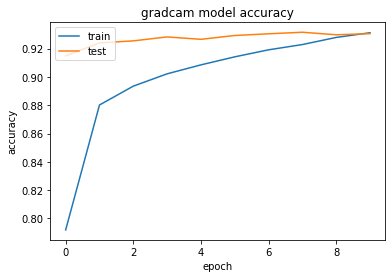

In [24]:
# summarize history for accuracy
plt.plot(history_gradcam.history['accuracy'])
plt.plot(history_gradcam.history['val_accuracy'])
plt.title('gradcam model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

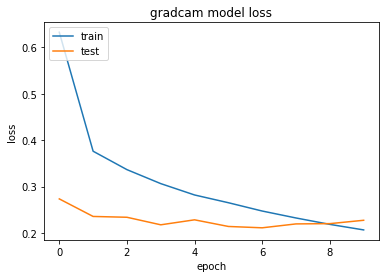

In [25]:
# summarize history for loss
plt.plot(history_gradcam.history['loss'])
plt.plot(history_gradcam.history['val_loss'])
plt.title('gradcam model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

6


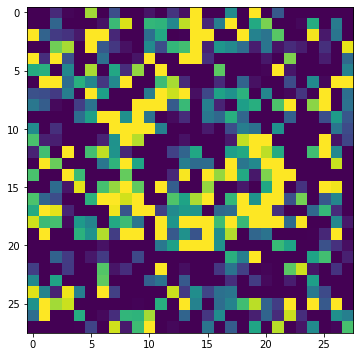

In [26]:
class_id = 1
indices = np.where(x_test[:, class_id] == 1.)[0]

# pick some random input from here.
idx = indices[0]

# Lets sanity check the picked image.
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)
pred = gradcam_model.predict(x_test_noisy[idx].reshape(1,28,28,1))
print(pred.argmax())
plt.imshow(x_test_noisy[idx][..., 0])

7
7 

2
2 

1
1 

0
0 

4
4 

1
1 

4
4 

9
9 

5
5 

9
9 



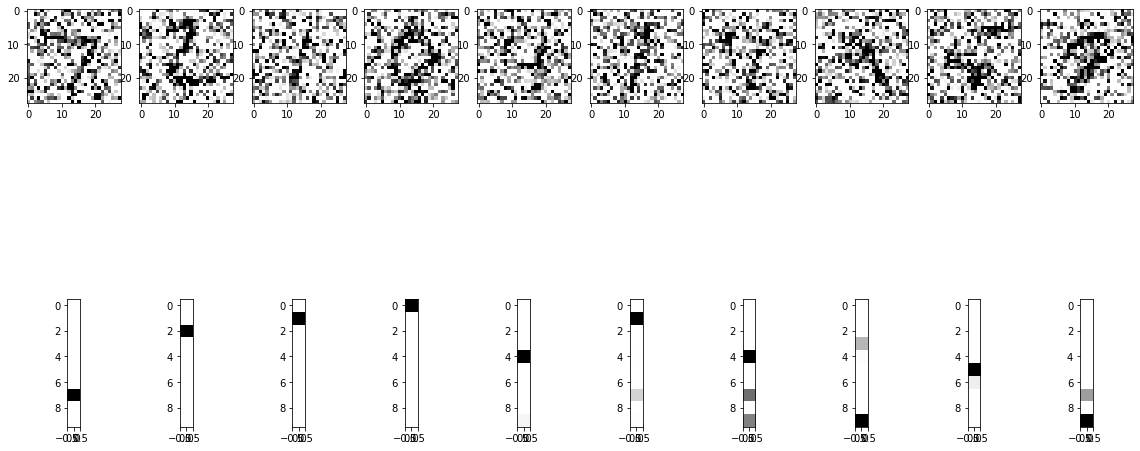

In [27]:
image_with_no_noise = gradcam_model.predict(x_test_noisy)

plt.figure(figsize=(40, 8))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
    pred_noisy = gradcam_model.predict(x_test_noisy[i].reshape(1,28,28,1))
    print(pred_noisy.argmax())
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(image_with_no_noise[i].reshape(10, 1), cmap="binary")
    print(image_with_no_noise[i].argmax(),"\n")
plt.show()